# Training an MLP from Scratch

# 1- init_params(nx, nh, ny)

In [1]:
import numpy as np

In [2]:
def init_params(nx,nh,ny):
    #nx is the nbr of neurons in the input layer
    #nh is the nbr of neurons in the hidden layer
    #ny is the nbr of neurons in the output layer
    # shape te3 w hwa (nx+1,nh)
    w1=np.random.normal(loc=0.0, scale=0.3, size=(nh,nx+1))
    w2=np.random.normal(loc=0.0, scale=0.3, size=(ny,nh+1))
    params={"w1":w1,
            "w2":w2}
    return params

In [3]:
params=init_params(2,2,4)

In [4]:
params

{'w1': array([[ 0.03732652, -0.0817064 , -0.26263285],
        [-0.25190537,  0.92286863,  0.32553491]]),
 'w2': array([[ 0.3470947 ,  0.21856849, -0.01815669],
        [ 0.28239515,  0.35139101, -0.0944953 ],
        [-0.59280949, -0.09762834,  0.6493541 ],
        [ 0.05288991,  0.12496636, -0.40649765]])}

In [5]:
params['w1']

array([[ 0.03732652, -0.0817064 , -0.26263285],
       [-0.25190537,  0.92286863,  0.32553491]])

In [6]:
params['w2']

array([[ 0.3470947 ,  0.21856849, -0.01815669],
       [ 0.28239515,  0.35139101, -0.0944953 ],
       [-0.59280949, -0.09762834,  0.6493541 ],
       [ 0.05288991,  0.12496636, -0.40649765]])

In [7]:
X=np.array([[0.5403, -0.4161],[-0.9900,-0.6536],[0.2837,0.9602]])
X.shape

(3, 2)

In [8]:
m = X.shape[0] 
X=np.c_[np.ones((m,1)),X]
X

array([[ 1.    ,  0.5403, -0.4161],
       [ 1.    , -0.99  , -0.6536],
       [ 1.    ,  0.2837,  0.9602]])

# 2- Forward prop

In [9]:
#from scipy.special import softmax
def tanh(x):
    return np.tanh(x)
def softmax(x):
    return np.exp(x) / np.sum(np.exp(x), axis=0)
def forward(params,X):
    #b = X.shape[0] 
    #X=np.c_[np.ones((b,1)),X]
    z1=np.matmul(params['w1'],X.transpose())
    a1=np.tanh(z1)
    m = a1.shape[1] 
    a1=np.r_[np.ones((1,m)),a1]
    z2=np.matmul(params['w2'],a1)
    y_hat=softmax(z2)
    outputs={"z1":z1,
        "a1":a1,
        'z2':z2}
    return outputs,y_hat


In [10]:
outputs,y_hat = forward(params,X)
outputs['a1']

array([[ 1.        ,  1.        ,  1.        ],
       [ 0.10210502,  0.28201763, -0.23363759],
       [ 0.11080858, -0.88057338,  0.31175763]])

In [11]:
y_hat

array([[0.32718356, 0.30666381, 0.3246736 ],
       [0.30825418, 0.31917277, 0.28809473],
       [0.13325943, 0.06087865, 0.16815619],
       [0.23130283, 0.31328476, 0.21907548]])

In [12]:
sum_of_softmax = np.sum(y_hat)
print(f"Sum of Softmax values: {sum_of_softmax}")

Sum of Softmax values: 3.0


# 3- Loss_Accuracy 

In [13]:
y=np.array([[0,0,0,1],[0,1,0,0],[0,0,1,0]])
y.transpose().shape


(4, 3)

In [14]:
def loss_accuracy(y, y_hat):
   y=y.transpose()
   epsilon = 1e-10  # Small constant to avoid log(0)
   loss = -np.sum(y * np.log(y_hat)) / y.shape[1]
   accuracy = np.mean(np.argmax(y_hat, axis=0) == np.argmax(y, axis=0))

   return loss, accuracy

In [15]:
loss,accuracy=loss_accuracy(y,y_hat)
loss

1.4629707396504592

In [16]:
accuracy

0.3333333333333333

# 4- Backward prop

In [17]:
def backward(x,params,outputs,y_hat, y):
    n=y.shape[0]
    y=y.transpose()
    w1=params['w1']
    w2=params['w2']
    z1=outputs['z1']
    z2=outputs['z2']
    a1=outputs['a1']
    dj_dyhat=y_hat-y #derivative of the cross entropy loss
    dyhat_dz2=softmax(z2)*(1-softmax(z2))#1# derivative of the softmax activation fct
    dz2_dw2=a1
    dj_dw2=np.dot(dj_dyhat*dyhat_dz2,dz2_dw2.transpose())
    # dj_dw1
    
    dz2_da1=w2[:,1:]
    da1_dz1=1 - np.tanh(z1)**2
    dz1_dw1=x
    dj_dz2=dj_dyhat*dyhat_dz2

    dj_da1=np.dot(dj_dz2.transpose(),dz2_da1)
    dj_dz1=dj_da1.transpose()*da1_dz1
    dj_dw1=np.dot(dj_dz1,dz1_dw1)
    # weights update
    grads={"dj_dw1":dj_dw1,
           "dj_dw2":dj_dw2}

    return grads


In [18]:
grads=backward(X,params,outputs,y_hat, y)
grads['dj_dw1'].shape

(2, 3)

In [19]:
grads['dj_dw1']

array([[ 0.04225887,  0.05189677,  0.05703522],
       [-0.0336265 ,  0.00869923, -0.10670673]])

In [20]:
grads['dj_dw2']

array([[ 0.20841573,  0.00911028, -0.02724184],
       [-0.02312754, -0.04881663,  0.15598056],
       [-0.09748582,  0.02973876, -0.03763489],
       [-0.03179675, -0.00370417, -0.06281026]])

#  mini batch sgd

In [21]:
def sgd(params, grads, eta):
      
     params['w1']-=eta*grads['dj_dw1']
     params['w2']-=eta*grads['dj_dw2']
     return params

In [22]:
sgd(params,grads,0.1)

{'w1': array([[ 0.03310063, -0.08689607, -0.26833637],
        [-0.24854272,  0.92199871,  0.33620558]]),
 'w2': array([[ 0.32625312,  0.21765746, -0.01543251],
        [ 0.2847079 ,  0.35627267, -0.11009335],
        [-0.58306091, -0.10060221,  0.65311759],
        [ 0.05606959,  0.12533678, -0.40021663]])}

In [23]:
import matplotlib.pyplot as plt
def mini_batch_sgd(X, y, params, batch_size=128, epochs=20, eta=0.01):
    loss_history = []
    accuracy_history = []

    for epoch in range(epochs):
        total_loss = 0
        correct_predictions = 0
        #random data
        shuffle_indices = np.random.permutation(len(X))
        X= X[shuffle_indices]
        y = y[shuffle_indices]


        for i in range(0, len(X), batch_size):
            #Load a batch of data
            x_batch = X[i:i + batch_size]
            y_batch = y[i:i + batch_size]

            outputs, y_hat = forward(params, x_batch)
            grads = backward(x_batch, params, outputs, y_hat, y_batch)
            params = sgd(params, grads, eta)

            batch_loss, batch_accuracy = loss_accuracy(y_batch, y_hat)
            total_loss += batch_loss
            correct_predictions += batch_accuracy * len(y_batch)

        average_loss = total_loss / (len(X) // batch_size)
        accuracy = correct_predictions / len(X)

        loss_history.append(average_loss)
        accuracy_history.append(accuracy)

        print(f"Epoch {epoch + 1}/{epochs} - Loss: {average_loss:.4f} - Accuracy: {accuracy:.4f}")

    plt.figure(figsize=(12, 4))

    plt.subplot(1, 2, 1)
    plt.plot(loss_history, label=' Loss')
    plt.title(' Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(accuracy_history, label=' Accuracy')
    plt.title(' Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.show()


 Parameters: learning rate= 0.1, batch size= 128, nbr of iterations= 50

# MNIST dataset import 

In [24]:
import tensorflow as tf
import tensorflow.keras as keras
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()


2024-03-09 19:40:22.457184: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-03-09 19:40:22.991807: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-03-09 19:40:22.991868: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-03-09 19:40:23.036820: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-03-09 19:40:23.207223: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-03-09 19:40:23.209819: I tensorflow/core/platform/cpu_feature_guard.cc:1

In [25]:
print('X_train: ' + str(x_train.shape))
print('Y_train: ' + str(y_train.shape))
print('X_test:  '  + str(x_test.shape))
print('Y_test:  '  + str(y_test.shape))

X_train: (60000, 28, 28)
Y_train: (60000,)
X_test:  (10000, 28, 28)
Y_test:  (10000,)


# Reshaping

In [26]:
x_train=x_train.reshape(x_train.shape[0],x_train.shape[1]*x_train.shape[2])
x_test=x_test.reshape(x_test.shape[0],x_test.shape[1]*x_test.shape[2])

In [27]:
print('x_train: ' + str(x_train.shape))
print('y_train: ' + str(y_train.shape))
print('x_test:  '  + str(x_test.shape))
print('y_test:  '  + str(y_test.shape))

x_train: (60000, 784)
y_train: (60000,)
x_test:  (10000, 784)
y_test:  (10000,)


In [28]:
x_train[0]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   3,  18,  18,  18,
       126, 136, 175,  26, 166, 255, 247, 127,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,  30,  36,  94, 154, 17

# Normalization -->  (X — Xmin)/(Xmax-Xmin) = X/255 

In [29]:
x_train=x_train/255
x_test=x_test/255

In [30]:
x_train[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

# Labeling : 5--> [0,0,0,0,0,1,0,0,0,0] (one hot encoding)

In [31]:
from keras.utils import to_categorical
print("class label for first image",y_train[0])
y_train=tf.keras.utils.to_categorical(y_train,10)
#y_test=tf.keras.utils.to_categorical(y_test,10)
print("class label for first image after labeling",y_train[0])


class label for first image 5
class label for first image after labeling [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [32]:
y_train.shape

(60000, 10)

In [33]:
nx = x_train.shape[1]
nh = 32
ny = y_train.shape[1]

In [34]:
params=init_params(nx,nh,ny)

In [35]:
params['w1'].shape

(32, 785)

In [36]:
params['w2'].shape

(10, 33)

# adding the bias term for x_train and x_test in order to be passed to the forward function

In [37]:
m = x_train.shape[0] 
x_train=np.c_[np.ones((m,1)),x_train]
x_train

array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.]])

Epoch 1/50 - Loss: 0.7268 - Accuracy: 0.7830
Epoch 2/50 - Loss: 0.3781 - Accuracy: 0.8945
Epoch 3/50 - Loss: 0.3203 - Accuracy: 0.9129
Epoch 4/50 - Loss: 0.2883 - Accuracy: 0.9236
Epoch 5/50 - Loss: 0.2649 - Accuracy: 0.9299
Epoch 6/50 - Loss: 0.2473 - Accuracy: 0.9359
Epoch 7/50 - Loss: 0.2333 - Accuracy: 0.9399
Epoch 8/50 - Loss: 0.2219 - Accuracy: 0.9431
Epoch 9/50 - Loss: 0.2128 - Accuracy: 0.9460
Epoch 10/50 - Loss: 0.2042 - Accuracy: 0.9487
Epoch 11/50 - Loss: 0.1969 - Accuracy: 0.9512
Epoch 12/50 - Loss: 0.1903 - Accuracy: 0.9530
Epoch 13/50 - Loss: 0.1845 - Accuracy: 0.9542
Epoch 14/50 - Loss: 0.1784 - Accuracy: 0.9564
Epoch 15/50 - Loss: 0.1738 - Accuracy: 0.9578
Epoch 16/50 - Loss: 0.1692 - Accuracy: 0.9590
Epoch 17/50 - Loss: 0.1650 - Accuracy: 0.9605
Epoch 18/50 - Loss: 0.1608 - Accuracy: 0.9617
Epoch 19/50 - Loss: 0.1568 - Accuracy: 0.9629
Epoch 20/50 - Loss: 0.1539 - Accuracy: 0.9642
Epoch 21/50 - Loss: 0.1504 - Accuracy: 0.9648
Epoch 22/50 - Loss: 0.1468 - Accuracy: 0.96

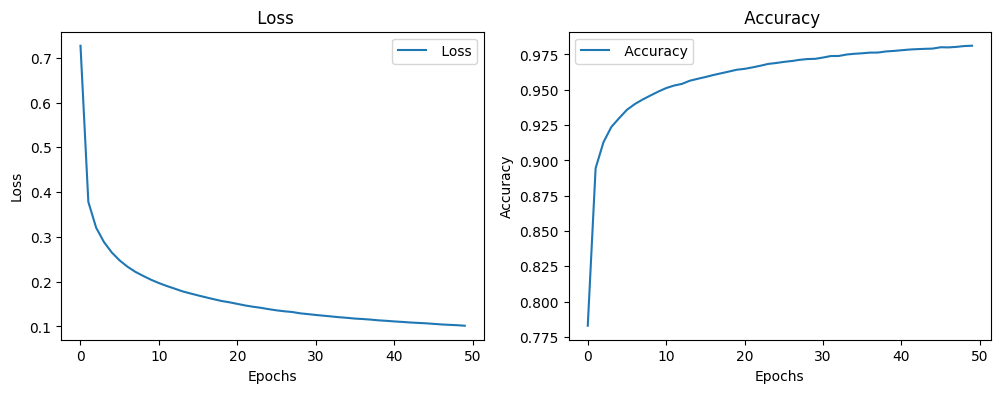

In [38]:
mini_batch_sgd(x_train,y_train,params,batch_size=128,epochs=50,eta=0.01)

# Trying on the test data

In [39]:
y_test=tf.keras.utils.to_categorical(y_test,10)

In [40]:
nx_test = x_test.shape[1]
nh_test = 32
ny_test = y_test.shape[1]

In [41]:
params=init_params(nx_test,nh_test,ny_test)

In [42]:
m = x_test.shape[0] 
x_test=np.c_[np.ones((m,1)),x_test]
x_test

array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.]])

Epoch 1/50 - Loss: 1.4940 - Accuracy: 0.5314
Epoch 2/50 - Loss: 0.6827 - Accuracy: 0.7993


Epoch 3/50 - Loss: 0.5208 - Accuracy: 0.8523
Epoch 4/50 - Loss: 0.4443 - Accuracy: 0.8777
Epoch 5/50 - Loss: 0.3975 - Accuracy: 0.8933
Epoch 6/50 - Loss: 0.3635 - Accuracy: 0.9034
Epoch 7/50 - Loss: 0.3363 - Accuracy: 0.9110
Epoch 8/50 - Loss: 0.3172 - Accuracy: 0.9206
Epoch 9/50 - Loss: 0.2992 - Accuracy: 0.9264
Epoch 10/50 - Loss: 0.2836 - Accuracy: 0.9298
Epoch 11/50 - Loss: 0.2732 - Accuracy: 0.9346
Epoch 12/50 - Loss: 0.2648 - Accuracy: 0.9373
Epoch 13/50 - Loss: 0.2492 - Accuracy: 0.9408
Epoch 14/50 - Loss: 0.2423 - Accuracy: 0.9436
Epoch 15/50 - Loss: 0.2337 - Accuracy: 0.9471
Epoch 16/50 - Loss: 0.2279 - Accuracy: 0.9504
Epoch 17/50 - Loss: 0.2189 - Accuracy: 0.9517
Epoch 18/50 - Loss: 0.2156 - Accuracy: 0.9544
Epoch 19/50 - Loss: 0.2080 - Accuracy: 0.9551
Epoch 20/50 - Loss: 0.2074 - Accuracy: 0.9581
Epoch 21/50 - Loss: 0.1968 - Accuracy: 0.9590
Epoch 22/50 - Loss: 0.1913 - Accuracy: 0.9607
Epoch 23/50 - Loss: 0.1850 - Accuracy: 0.9624
Epoch 24/50 - Loss: 0.1808 - Accuracy: 0.

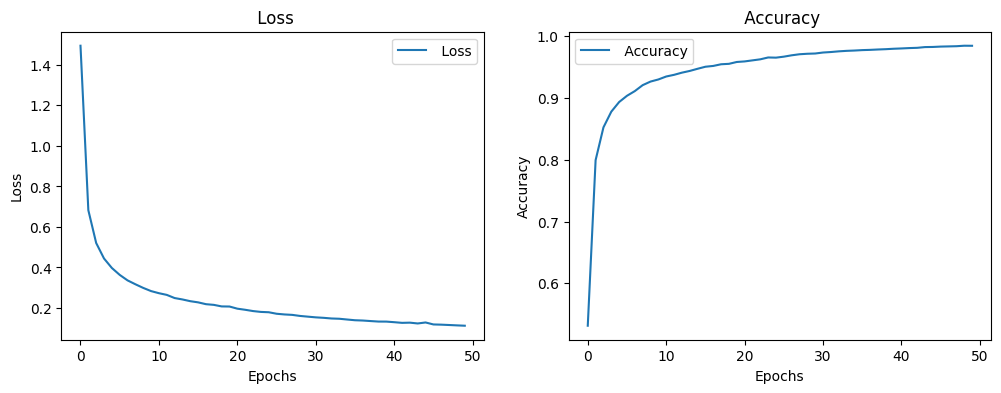

In [43]:
mini_batch_sgd(x_test,y_test,params,batch_size=128,epochs=50,eta=0.01)